In [56]:
import torch
import matplotlib.pyplot as plt

import torchvision
from torchvision import datasets,transforms

In [57]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [58]:
train_data = datasets.FashionMNIST(
    root="data/fashion-mnist",download=True,train=True,transform=transforms.ToTensor()
    )

test_data = datasets.FashionMNIST(
    root="data/fashion-mnist",
    download=True,
    train=False,
    transform=transforms.ToTensor(),
)

In [59]:
len(train_data), len(test_data)

(60000, 10000)

In [60]:
img,label = train_data[0]
label,img

(9,
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.00

In [61]:
classes_name = train_data.classes,
classes_name = classes_name[0]
len(train_data.classes), classes_name

(10,
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

In [62]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [63]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [64]:
img,label  = train_data[0]
print(f"image shape: {img.shape},\nlabel: {classes_name[label]}")

image shape: torch.Size([1, 28, 28]),
label: Ankle boot


Image shape: torch.Size([1, 28, 28])


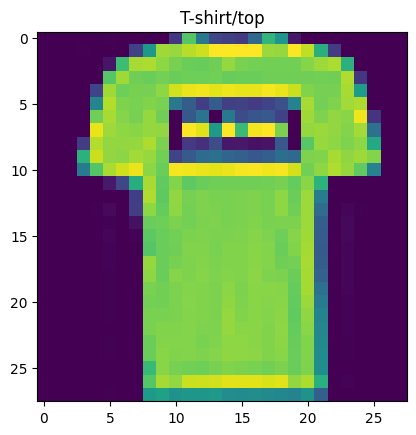

In [65]:
img,label = train_data[1]
plt.title(classes_name[label])
print(f"Image shape: {img.shape}")
plt.imshow(img.squeeze())

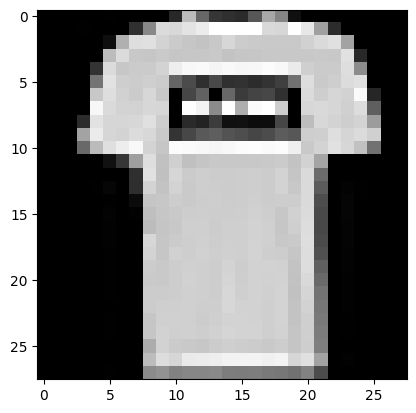

In [66]:
plt.imshow(img.squeeze(),cmap="gray")

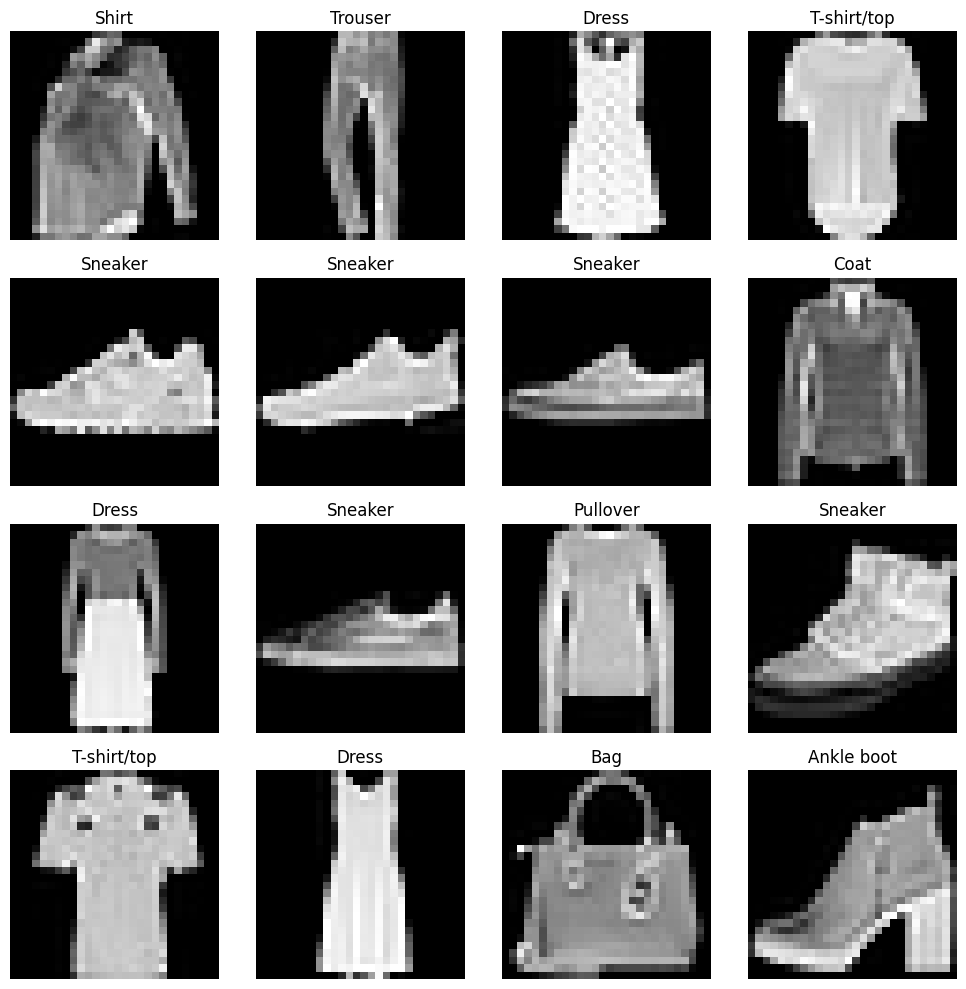

In [67]:
# torch.manual_seed(42)

fig = plt.figure(figsize=(10,10))

n_rows = 4
n_cols = 4

for i in range(1,n_rows * n_cols + 1):
    random_idx = torch.randint(low=0,high=len(train_data),size=(1,)).item()
    img,label = train_data[random_idx]
    fig.add_subplot(n_rows,n_cols,i)
    plt.title(classes_name[label])
    plt.imshow(img.squeeze(),cmap="gray")
    plt.axis(False)

plt.tight_layout()

In [68]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data/fashion-mnist
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data/fashion-mnist
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [69]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

print(f"Train data loader length: {len(train_dataloader)}, batch size {train_dataloader.batch_size}"),
print(
    f"Test data loader length: {len(test_dataloader)}, batch size {test_dataloader.batch_size}"
),

Train data loader length: 1875, batch size 32
Test data loader length: 313, batch size 32


(None,)

In [70]:
len(train_dataloader.dataset)

60000

In [71]:
train_features_batch ,train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

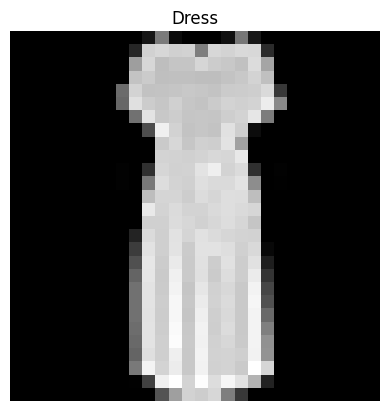

In [72]:
random_idx = torch.randint(0,len(train_features_batch),size=(1,)).item()
img,label = train_features_batch[random_idx],train_label_batch[random_idx]

plt.title(classes_name[label])
plt.imshow(img.squeeze(),cmap="gray")
plt.axis(False)

In [73]:
from torch import nn
flatten_model = nn.Flatten()

x = train_features_batch[0]
flatten_image = flatten_model(x)


print(f"{x.shape}")
flatten_image.shape

torch.Size([1, 28, 28])


torch.Size([1, 784])

In [74]:
len(train_dataloader)

1875

In [75]:
from typing import Union,List

class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape:int,hidden_units:Union[int,List[int]],output_shape:int) -> None:
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

    def forward(self,x:torch.Tensor):
        return self.layers_stack(x)

In [76]:
torch.manual_seed(42)
model_v0 = FashionMNISTModelV0(input_shape=28*28,hidden_units=10,output_shape=len(classes_name))
model_v0

FashionMNISTModelV0(
  (layers_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [77]:
import sys
from pathlib import Path

sys.path.append(str(Path("helper_functions.py").resolve().parent.parent))

from helper_functions import plot_decision_boundary

In [78]:
dummy_x = torch.rand(size=(1,1,28,28))

y_pred = model_v0(dummy_x)
y_pred.shape

torch.Size([1, 10])

In [79]:
model_v0.state_dict()

OrderedDict([('layers_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layers_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layers_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, 

In [80]:
import torchmetrics

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v0.parameters(),lr=0.1)
accuracy_fn= torchmetrics.Accuracy(task="multiclass", num_classes=len(classes_name))

In [81]:
def print_train_time(start:float,end:float,device:torch.device = None):
    total_time = end - start
    print(f"Total time on {device} is: {total_time:.3f} in seconds")

In [82]:
from timeit import default_timer as timer

start = timer()

end = timer()
print_train_time(start,end,device="cpu")

Total time on cpu is: 0.000 in seconds


In [83]:
from tqdm.auto import tqdm

start = timer()

torch.manual_seed(42)

epochs = 3
model_v0.to("cpu")

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")

    train_loss = 0
    for batch,(X,y) in enumerate(train_dataloader):
        model_v0.train()
        y_logits = model_v0(X)
        y_preds = torch.argmax(y_logits,dim=1)

        loss = loss_fn(y_logits, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at batch {batch * len(X)} / { len(train_dataloader.dataset)} samples")
            train_acc = accuracy_fn(y_preds.cpu(), y.cpu())
    train_loss /= len(train_dataloader)

    model_v0.eval()
    test_loss = 0
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            y_logits = model_v0(X_test)
            y_preds = torch.argmax(y_logits,dim=1)

            loss = loss_fn(y_logits, y_test)
            test_loss += loss

            test_acc = accuracy_fn(y_preds, y_test)

        test_loss /= len(test_dataloader)

    print(f"Train loss: {train_loss.item()} | Train Acc: {train_acc}")
    print(f"Test loss: {test_loss} | Test Acc: {test_acc}")
end = timer()

print_train_time(start,end,device="cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at batch 0 / 60000 samples
Looked at batch 12800 / 60000 samples
Looked at batch 25600 / 60000 samples
Looked at batch 38400 / 60000 samples
Looked at batch 51200 / 60000 samples


 33%|███▎      | 1/3 [00:08<00:17,  8.94s/it]

Train loss: 0.5903892517089844 | Train Acc: 0.9375
Test loss: 0.5095350742340088 | Test Acc: 0.875
Epoch: 1
----
Looked at batch 0 / 60000 samples
Looked at batch 12800 / 60000 samples
Looked at batch 25600 / 60000 samples
Looked at batch 38400 / 60000 samples
Looked at batch 51200 / 60000 samples


 67%|██████▋   | 2/3 [00:40<00:22, 22.18s/it]

Train loss: 0.4763319790363312 | Train Acc: 0.90625
Test loss: 0.47989004850387573 | Test Acc: 0.9375
Epoch: 2
----
Looked at batch 0 / 60000 samples
Looked at batch 12800 / 60000 samples
Looked at batch 25600 / 60000 samples
Looked at batch 38400 / 60000 samples
Looked at batch 51200 / 60000 samples


100%|██████████| 3/3 [00:46<00:00, 15.54s/it]

Train loss: 0.4550333023071289 | Train Acc: 0.875
Test loss: 0.47663894295692444 | Test Acc: 0.9375
Total time on cpu is: 46.612 in seconds


In [84]:
model_v0.to("cuda")

FashionMNISTModelV0(
  (layers_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [85]:
from tqdm.auto import tqdm

start = timer()

# torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 3


for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")

    train_loss = 0

    for batch,(X,y) in enumerate(train_dataloader):
        model_v0.train()
        X = X.to("cuda")
        y = y.to("cuda")

        y_logits = model_v0(X)
        y_preds = torch.argmax(y_logits, dim=1)
        loss = loss_fn(y_logits, y)

        train_loss += loss
        train_acc = accuracy_fn(y_preds.to("cpu"), y.to("cpu"))
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at batch: {batch * len(X)} / {len(train_dataloader.dataset)}")

    test_loss = 0 
    for X_test,y_test in test_dataloader:
        X_test = X_test.to("cuda")
        y_test = y_test.to("cuda")
        y_logits = model_v0(X_test)
        y_preds = torch.argmax(y_logits,dim=1)

        test_loss += loss_fn(y_logits.cpu(), y_test.cpu())
        test_acc = accuracy_fn(y_preds.cpu(), y_test.cpu())

    train_loss /= len(train_dataloader)
    test_loss /= len(test_dataloader)
    print(f"Train loss: {train_loss} | Train Acc: {train_acc}")
    print(f"Test loss: {test_loss} | Test Acc: {test_acc}")


end = timer()

print_train_time(start,end,"cuda")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at batch: 0 / 60000
Looked at batch: 12800 / 60000
Looked at batch: 25600 / 60000
Looked at batch: 38400 / 60000
Looked at batch: 51200 / 60000


 33%|███▎      | 1/3 [00:08<00:16,  8.01s/it]

Train loss: 0.4425109028816223 | Train Acc: 0.875
Test loss: 0.4630562663078308 | Test Acc: 0.875
Epoch: 1
----
Looked at batch: 0 / 60000
Looked at batch: 12800 / 60000
Looked at batch: 25600 / 60000
Looked at batch: 38400 / 60000
Looked at batch: 51200 / 60000


 67%|██████▋   | 2/3 [00:23<00:12, 12.44s/it]

Train loss: 0.43581557273864746 | Train Acc: 0.78125
Test loss: 0.4686938524246216 | Test Acc: 0.8125
Epoch: 2
----
Looked at batch: 0 / 60000
Looked at batch: 12800 / 60000
Looked at batch: 25600 / 60000
Looked at batch: 38400 / 60000
Looked at batch: 51200 / 60000


100%|██████████| 3/3 [00:37<00:00, 12.45s/it]

Train loss: 0.42914652824401855 | Train Acc: 0.8125
Test loss: 0.45892006158828735 | Test Acc: 0.875
Total time on cuda is: 37.359 in seconds


In [86]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,acc_fn,device:torch.device):
    loss = 0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X = X.to(device)
            y = y.to(device)
            y_logits = model(X)
            y_preds = torch.argmax(y_logits,dim=1)

            loss += loss_fn(y_logits,y)
            acc = acc_fn(y_preds.cpu(),y.cpu())
        loss /= len(data_loader)
    return {"model_name": model.__class__.__name__, "model_loss": round(loss.item(),4),"model_acc":acc}

In [87]:
model_v0_results = eval_model(model_v0.cpu(),test_dataloader,loss_fn,accuracy_fn,device="cpu")
model_v0_results

100%|██████████| 313/313 [00:00<00:00, 410.37it/s]

Test loss: 0.45892006158828735 | Test acc: 0.875


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4589,
 'model_acc': tensor(0.8750)}

In [110]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape),
            nn.ReLU(),
        )

    def forward(self,x):
        return self.layers(x)

In [111]:
torch.manual_seed(42)
model_v1 = FashionMNISTModelV1(input_shape=28*28,hidden_units=10,output_shape=len(classes_name)).to(device)

In [112]:
next(model_v1.parameters()).device

device(type='cuda', index=0)

In [113]:
loss_fn  = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v1.parameters(),lr=0.1)
accuracy_fn = torchmetrics.Accuracy(task="multiclass",num_classes=len(classes_name))

In [114]:
def train_step(model:nn.Module,data_loader:torch.utils.data.DataLoader,device:torch.device,loss_fn:nn.Module,optimizer:torch.optim.Optimizer,acc_fn:torchmetrics.Metric):

    model.train()
    train_loss = 0
    for batch, (X, y) in enumerate(data_loader):
        X = X.to(device)
        y = y.to(device)
        y_preds = model(X)
        # y_preds = torch.argmax(y_logits,dim=1)

        loss = loss_fn(y_preds, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # if batch % 400 == 0:
        #     print(f"Lookead at {batch * len(X)} / {len(train_dataloader.dataset)}")

    train_loss /= len(train_dataloader)
    train_acc = acc_fn(y_preds.cpu(),y.cpu())
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc}")

In [211]:
def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    acc_fn,
    device: torch.device,
):
    loss = 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X = X.to(device)
            y = y.to(device)
            y_logits = model(X)
            y_preds = torch.argmax(y_logits, dim=1)

            loss += loss_fn(y_logits, y)
            acc = acc_fn(y_preds.cpu(), y.cpu())
        loss /= len(data_loader)
        print(f"Test loss: {loss:.4f} | Test acc: {acc:.4f}")

In [116]:
start = timer()
model_v1.to("cpu")
torch.manual_seed(42)

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")

    train_step(
        model=model_v1,
        data_loader=train_dataloader,
        device="cpu",
        acc_fn=accuracy_fn,
        loss_fn=loss_fn,
        optimizer=optimizer,
    )
    test_step(model_v1, test_dataloader, loss_fn, accuracy_fn, device="cpu")
end = timer()

print_train_time(start, end, device="cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train Loss: 1.0920 | Train Acc: 0.625


 33%|███▎      | 1/3 [00:05<00:11,  5.78s/it]

Test loss: 0.9563649296760559 | Test acc: 0.75
Epoch: 1
----
Train Loss: 0.7378 | Train Acc: 0.875


 67%|██████▋   | 2/3 [00:16<00:08,  8.63s/it]

Test loss: 0.7230035066604614 | Test acc: 0.8125
Epoch: 2
----
Train Loss: 0.6678 | Train Acc: 0.625


100%|██████████| 3/3 [00:43<00:00, 14.55s/it]

Test loss: 0.68743497133255 | Test acc: 0.9375
Total time on cpu is: 43.647 in seconds


In [117]:
start = timer()
model_v1.to("cuda")
torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")
    train_step(
        model=model_v1,
        data_loader=train_dataloader,
        device="cuda",
        acc_fn=accuracy_fn,
        loss_fn=loss_fn,
        optimizer=optimizer,
    )
    test_step(model_v1,test_dataloader,loss_fn,accuracy_fn,device)
end = timer()

print_train_time(start,end,device="cuda")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train Loss: 0.6444 | Train Acc: 0.71875


 33%|███▎      | 1/3 [00:06<00:13,  6.97s/it]

Test loss: 0.6777657866477966 | Test acc: 0.8125
Epoch: 1
----
Train Loss: 0.6262 | Train Acc: 0.875


 67%|██████▋   | 2/3 [00:13<00:06,  6.97s/it]

Test loss: 0.6762909889221191 | Test acc: 0.75
Epoch: 2
----
Train Loss: 0.6161 | Train Acc: 0.65625


100%|██████████| 3/3 [00:21<00:00,  7.25s/it]

Test loss: 0.6481072306632996 | Test acc: 0.875
Total time on cuda is: 21.744 in seconds


In [119]:
model_v0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4589,
 'model_acc': tensor(0.8750)}

In [118]:
model_v1_results = eval_model(model_v1,test_dataloader,loss_fn,accuracy_fn,device)
model_v1_results

100%|██████████| 313/313 [00:01<00:00, 252.15it/s]

Test loss: 0.6481072306632996 | Test acc: 0.875


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6481,
 'model_acc': tensor(0.8750)}

In [206]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7,out_features=output_shape),

        )
    def forward(self,x):
        x  = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [207]:
torch.manual_seed(42)
model_v2 = FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=len(classes_name)).to(device)

In [212]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_v1.parameters(), lr=0.01)
accuracy_fn = torchmetrics.Accuracy(task="multiclass", num_classes=len(classes_name))

In [210]:
start = timer()
model_v2.to("cuda")
torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")
    train_step(
        model=model_v2,
        data_loader=train_dataloader,
        device="cuda",
        acc_fn=accuracy_fn,
        loss_fn=loss_fn,
        optimizer=optimizer,
    )
    test_step(model_v2, test_dataloader, loss_fn, accuracy_fn, device)
end = timer()

print_train_time(start, end, device="cuda")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train Loss: 2.3023 | Train Acc: 0.125


 33%|███▎      | 1/3 [00:08<00:17,  8.94s/it]

Test loss: 2.3023061752319336 | Test acc: 0.0625
Epoch: 1
----
Train Loss: 2.3023 | Train Acc: 0.09375


 67%|██████▋   | 2/3 [00:17<00:08,  8.95s/it]

Test loss: 2.3023061752319336 | Test acc: 0.0625
Epoch: 2
----
Train Loss: 2.3023 | Train Acc: 0.0625


100%|██████████| 3/3 [00:26<00:00,  8.95s/it]

Test loss: 2.3023061752319336 | Test acc: 0.0625
Total time on cuda is: 26.860 in seconds


In [183]:
torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Images shape {images.shape}")
print(f"Image shape {test_image.shape}")

Images shape torch.Size([32, 3, 64, 64])
Image shape torch.Size([3, 64, 64])


In [184]:
torch.manual_seed(42)
conv_layers = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,padding=0,stride=1)
conv_layers(test_image).shape

torch.Size([10, 62, 62])

In [180]:
print(f"Test image shape: {test_image.shape}")


after_conv_layer = conv_layers(test_image)
print(f"After go in conv layer : {after_conv_layer.shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(after_conv_layer)
print(f"After go in conv layer and max pool layer: {max_pool_tensor.shape}")

Test image shape: torch.Size([3, 64, 64])
After go in conv layer : torch.Size([10, 62, 62])
After go in conv layer and max pool layer: torch.Size([10, 31, 31])


In [198]:
random_tensor = torch.randn(size=(1,1,28,28)).to(device)
model_v2(random_tensor)

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x490 and 7x10)